In [30]:
from math import sqrt
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

def compute_gradient(image):
    filter1 = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    filter2 = np.array([[1,2,1], [0,0,0], [-1,-2,-1]])
    Gx = signal.convolve2d(image, filter1)
    Gy = signal.convolve2d(image, filter2)
    im_magnitude = np.sqrt(Gx**2+Gy**2)
    im_direction = (np.tan(Gx/Gy))**(-1)                   
    return Gx, Gy, im_magnitude,im_direction

In [31]:
import cv2
img = cv2.imread('./images/image2.jpg')
print(img.shape)
img = np.mean(img, axis=2)
print(img.shape)

(533, 800, 3)
(533, 800)


In [32]:
Gx, Gy, im_magnitude, im_direction = compute_gradient(img)

<ipython-input-30-84bf27ff19b9>:12: RuntimeWarning: divide by zero encountered in true_divide
  im_direction = (np.tan(Gx/Gy))**(-1)
<ipython-input-30-84bf27ff19b9>:12: RuntimeWarning: invalid value encountered in true_divide
  im_direction = (np.tan(Gx/Gy))**(-1)
<ipython-input-30-84bf27ff19b9>:12: RuntimeWarning: invalid value encountered in tan
  im_direction = (np.tan(Gx/Gy))**(-1)
<ipython-input-30-84bf27ff19b9>:12: RuntimeWarning: divide by zero encountered in reciprocal
  im_direction = (np.tan(Gx/Gy))**(-1)


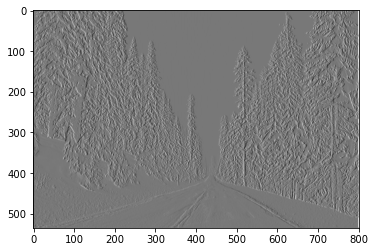

In [33]:
plt.imshow(Gx, cmap='gray')

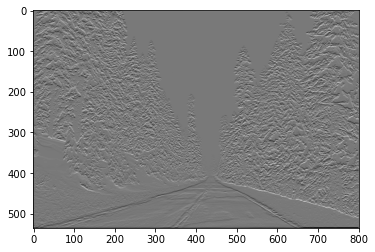

In [34]:
plt.imshow(Gy, cmap='gray')